# BNL: Boundaries and Labels - Complete Demo

This notebook demonstrates the key features of BNL, a Python library for hierarchical music segmentation analysis.

## Key Features:
- 🎵 **Core Data Structures**: TimeSpan, Segmentation, Hierarchy
- 🔧 **Convenient Construction**: From boundaries, intervals, or manual creation
- 📊 **Rich Visualization**: Plot segmentations with customizable styling
- 📁 **Dataset Integration**: Load and work with SALAMI dataset
- ✅ **Robust Design**: Input validation and error handling


In [16]:
%load_ext autoreload
%autoreload 2
import bnl
import bnl.data as data
import numpy as np
import matplotlib.pyplot as plt

# Set up matplotlib for inline plots
%matplotlib inline
plt.style.use('default')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Core Data Structures

BNL provides three main data structures for representing musical segments:


In [17]:
# Create individual time spans with labels
verse = bnl.TimeSpan(start=0.0, end=30.0, name="verse")
chorus = bnl.TimeSpan(start=30.0, end=60.0, name="chorus")
bridge = bnl.TimeSpan(start=60.0, end=90.0, name="bridge")

print(f"Verse: {verse}")
print(f"Chorus: {chorus}")
print(f"Bridge: {bridge}")

# TimeSpan automatically validates start < end
print(f"\nDuration calculation: verse lasts {verse.end - verse.start} seconds")


Verse: [0.00-30.00s] (verse)
Chorus: [30.00-60.00s] (chorus)
Bridge: [60.00-90.00s] (bridge)

Duration calculation: verse lasts 30.0 seconds


## 2. Building Segmentations

Combine multiple TimeSpans into a Segmentation:


Segmentation: Segmentation(3 segments, duration=90.00s)
Duration: 90.0 seconds
Labels: ['verse', 'chorus', 'bridge']
Boundaries: [0.0, 30.0, 60.0, 90.0]
Number of segments: 3

First segment: [0.00-30.00s] (verse)
Intervals array shape: (3, 2)
Segmentation(3 segments, duration=90.00s)


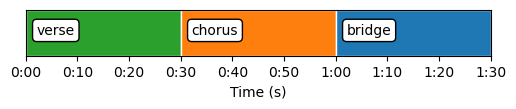

In [5]:
# Create a segmentation from individual time spans
song_structure = bnl.Segmentation(segments=[verse, chorus, bridge])

print(f"Segmentation: {song_structure}")
print(f"Duration: {song_structure.end - song_structure.start:.1f} seconds")
print(f"Labels: {song_structure.labels}")
print(f"Boundaries: {song_structure.bdrys}")
print(f"Number of segments: {len(song_structure)}")

# Access individual segments
print(f"\nFirst segment: {song_structure[0]}")
print(f"Intervals array shape: {song_structure.itvls.shape}")

song_structure.plot()



## 3. Convenient Construction Methods

BNL provides utility functions for common segmentation creation patterns:


In [6]:
# Method 1: From boundaries
boundaries = [0, 15, 45, 75, 90]
labels = ["intro", "verse", "chorus", "verse", "outro"]
seg_from_boundaries = bnl.Segmentation.from_boundaries(boundaries, labels)

print(f"From boundaries: {seg_from_boundaries}")

# Method 2: From intervals (start, end pairs)
intervals = np.array([[0, 30], [30, 60], [60, 90]])
interval_labels = ["A", "B", "A"]
seg_from_intervals = bnl.Segmentation.from_intervals(intervals, interval_labels)

print(f"From intervals: {seg_from_intervals}")

# Segments are automatically sorted and validated
unsorted_boundaries = [90, 0, 45, 15, 75]
seg_auto_sorted = bnl.Segmentation.from_boundaries(unsorted_boundaries, labels)
print(f"Auto-sorted: {seg_auto_sorted.bdrys}")


From boundaries: Segmentation(4 segments, duration=90.00s)
From intervals: Segmentation(3 segments, duration=90.00s)
Auto-sorted: [np.int64(0), np.int64(15), np.int64(45), np.int64(75), np.int64(90)]


## 4. Visualization

BNL provides rich visualization capabilities with automatic styling:


/var/folders/53/f13fy0gs1wdb_kybq06h266h0002m8/T/ipykernel_5738/1488067319.py:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


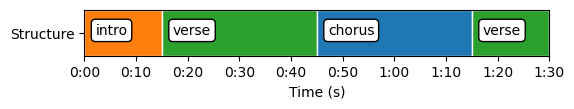

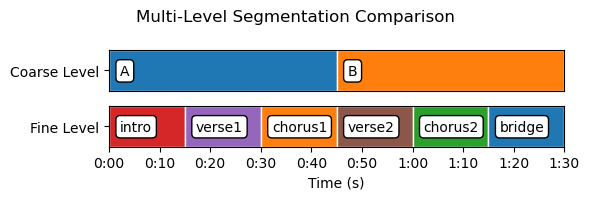

In [10]:
# Plot a segmentation (convenient method)
fig, ax = seg_from_boundaries.plot(title=True, ytick="Structure")
plt.tight_layout()
plt.show()

# Multiple segmentations comparison
fig, axes = plt.subplots(2, 1, figsize=(6, 2))

# Fine-grained segmentation
fine_seg = bnl.Segmentation.from_boundaries([0, 15, 30, 45, 60, 75, 90], 
                              ["intro", "verse1", "chorus1", "verse2", "chorus2", "bridge", "outro"])
fine_seg.name="Fine Level"
bnl.viz.plot_segment(fine_seg, ax=axes[1], ytick=fine_seg.name, title=False)

# Coarse segmentation  
coarse_seg = bnl.Segmentation.from_boundaries([0, 45, 90], ["A", "B"])
coarse_seg.name="Coarse Level"
bnl.viz.plot_segment(coarse_seg, ax=axes[0], ytick=coarse_seg.name, title=False, time_ticks=False)

plt.suptitle("Multi-Level Segmentation Comparison")
plt.tight_layout()
plt.show()


## 5. Hierarchical Structures

Create multi-level hierarchies to represent different levels of musical structure:


In [11]:
# Create a hierarchy with multiple levels
fine_level = bnl.Segmentation.from_boundaries([0, 15, 30, 45, 60, 75, 90],
                                ["intro", "verse", "chorus", "verse", "chorus", "bridge", "outro"])

medium_level = bnl.Segmentation.from_boundaries([0, 30, 60, 90], 
                                  ["section_A", "section_B", "section_C"])

coarse_level = bnl.Segmentation.from_boundaries([0, 45, 90], ["part_1", "part_2"])

hierarchy = bnl.Hierarchy(layers=[coarse_level, medium_level, fine_level])

print(f"Hierarchy: {hierarchy}")
print(f"Number of levels: {len(hierarchy)}")
print(f"Labels by level: {hierarchy.labels}")

# Access individual levels
print(f"\nCoarsest level: {hierarchy[0]}")
print(f"Finest level: {hierarchy[2]}")

# Get all boundaries across levels
print(f"Boundaries by level: {hierarchy.bdrys}")


Hierarchy: Hierarchy(3 levels, duration=90.00s)
Number of levels: 3
Labels by level: [['part_1', 'part_2'], ['section_A', 'section_B', 'section_C'], ['intro', 'verse', 'chorus', 'verse', 'chorus', 'bridge']]

Coarsest level: Segmentation(2 segments, duration=90.00s)
Finest level: Segmentation(6 segments, duration=90.00s)
Boundaries by level: [[np.int64(0), np.int64(45), np.int64(90)], [np.int64(0), np.int64(30), np.int64(60), np.int64(90)], [np.int64(0), np.int64(15), np.int64(30), np.int64(45), np.int64(60), np.int64(75), np.int64(90)]]


## 6. Working with SALAMI Dataset

BNL includes built-in support for the SALAMI music structure dataset:


In [12]:
# List available track IDs (if dataset is available locally)
track_ids = data.slm.list_tids()
print(f"Found {len(track_ids)} SALAMI tracks")
if track_ids:
    print(f"Example track IDs: {track_ids[:5]}")

# Try to load a track (if available)
if track_ids:
    try:
        # Load the first available track
        track = data.slm.load_track(track_ids[0])
        print(f"\nLoaded track: {track}")
        
        # Access track information
        info = track.info
        print(f"Artist: {info.get('artist', 'Unknown')}")
        print(f"Title: {info.get('title', 'Unknown')}")
        print(f"Duration: {info.get('duration', 0):.1f} seconds")
        
        # Access JAMS annotations
        jams_data = track.jams
        print(f"JAMS annotations: {len(jams_data.annotations)} annotation types")
        
    except Exception as e:
        print(f"Could not load track data: {e}")
        print("This is normal if SALAMI dataset is not locally available")
else:
    print("No SALAMI tracks found. This is normal if the dataset is not installed locally.")
    print("You can still use all other BNL features with your own data!")


Found 1359 SALAMI tracks
Example track IDs: ['2', '3', '4', '5', '6']

Loaded track: SALAMI Track(2 (The Smashing Pumpkins - For God And Country), 264.9s)
Artist: The Smashing Pumpkins
Title: For God And Country
Duration: 264.9 seconds
JAMS annotations: 8 annotation types


## 7. Custom Dataset Configuration

Configure BNL to work with your own dataset paths:


In [13]:
# Get current configuration
current_config = data.get_config()
print(f"Current data root: {current_config.data_root}")
print(f"SALAMI annotations: {current_config.salami_annotations_dir}")

# Create custom configuration (example)
custom_config = data.base.DatasetConfig(
    data_root="/path/to/your/music/data",
    salami_annotations_dir="/path/to/salami/jams",
    salami_audio_dir="/path/to/salami/audio"
)

print(f"\nCustom config created: {custom_config.data_root}")
print("You can set this config globally with: data.set_config(custom_config)")

# The config system handles Path conversion automatically
print(f"Path type: {type(custom_config.data_root)}")


Current data root: /Users/xi/data
SALAMI annotations: /Users/xi/data/salami-jams

Custom config created: /path/to/your/music/data
You can set this config globally with: data.set_config(custom_config)
Path type: <class 'pathlib.PosixPath'>


## 8. Robust Design & Error Handling

BNL includes comprehensive validation and graceful error handling:


✅ Validation caught error: Start time (10.0) must be less than end time (5.0)

Empty segmentation: Segmentation(0 segments): []
Empty boundaries: []
Empty intervals shape: (0,)


/Users/xi/code/bnl/src/bnl/viz.py:185: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(t_start, t_end)


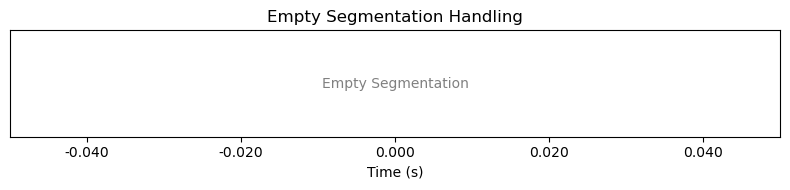

\nLoading multiple tracks (some may fail gracefully):
Successfully loaded: 0 tracks


In [14]:
# Input validation
try:
    invalid_span = bnl.TimeSpan(start=10.0, end=5.0)  # Invalid: start > end
except ValueError as e:
    print(f"✅ Validation caught error: {e}")

# Empty segmentation handling
empty_seg = bnl.Segmentation()
print(f"\nEmpty segmentation: {empty_seg}")
print(f"Empty boundaries: {empty_seg.bdrys}")
print(f"Empty intervals shape: {empty_seg.itvls.shape}")

# Visualize empty segmentation
fig, ax = plt.subplots(figsize=(8, 2))
bnl.viz.plot_segment(empty_seg, ax=ax, title=True)
ax.set_title("Empty Segmentation Handling")
plt.tight_layout()
plt.show()

# Multiple track loading with error handling
print("\\nLoading multiple tracks (some may fail gracefully):")
test_tracks = data.slm.load_tracks(["999999", "999998"])  # Non-existent tracks
print(f"Successfully loaded: {len(test_tracks)} tracks")


## 🎉 Summary

**BNL provides a complete toolkit for music segmentation analysis:**

### Core Features ✅
- **TimeSpan**: Basic labeled time intervals with validation
- **Segmentation**: Collections of segments with rich properties
- **Hierarchy**: Multi-level segmentation structures
- **Construction utilities**: `Segmentation.from_boundaries()`, `Segmentation.from_intervals()`

### Visualization ✅  
- **Rich plotting**: Automatic styling and customization
- **Comparative analysis**: Multi-level visualization
- **Error-friendly**: Graceful handling of edge cases

### Dataset Integration ✅
- **SALAMI support**: Built-in dataset loading
- **Flexible configuration**: Custom data paths
- **Robust error handling**: Graceful degradation when data unavailable

### Development-Ready ✅
- **99%+ test coverage**: Thoroughly tested codebase
- **Type hints**: Full static analysis support  
- **Comprehensive docs**: Sphinx documentation
- **Clean API**: Intuitive and consistent interface

**Ready for your music analysis projects!** 🎵
